In [72]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [73]:
len(y_train)

60000

In [74]:
(x_train, y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

In [75]:
len(x_train)

60000

In [76]:
x_train[0].shape

(28, 28)

In [77]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

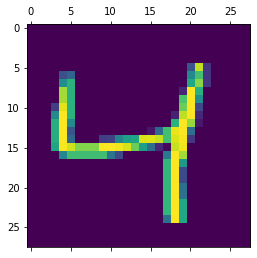

In [78]:
plt.matshow(x_train[2])

In [79]:
y_train[2]

4

In [80]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [81]:
x_train=x_train/255
x_test=x_test/255

In [82]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)


In [83]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 925us/step - loss: 0.7260 - accuracy: 0.8129
Epoch 2/5
1875/1875 [==============================] - 1s 748us/step - loss: 0.3144 - accuracy: 0.9116
Epoch 3/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.2865 - accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 1s 760us/step - loss: 0.2723 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 1s 761us/step - loss: 0.2644 - accuracy: 0.9265


In [85]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 652us/step - loss: 0.2701 - accuracy: 0.9253


[0.2701093852519989, 0.9253000020980835]

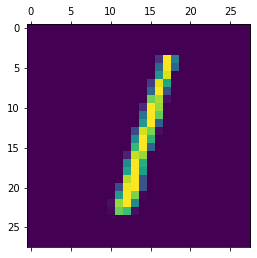

In [86]:
plt.matshow(x_test[2])

In [87]:
y_predicted=model.predict(x_test_flattened)
y_predicted[2]

array([3.92496586e-04, 9.89451766e-01, 6.10496044e-01, 2.55274773e-01,
       2.10005641e-02, 8.26643109e-02, 1.13212109e-01, 1.18955165e-01,
       3.37507248e-01, 3.86417806e-02], dtype=float32)

In [88]:
np.argmax(y_predicted[2])

1

In [89]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [90]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [93]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    2,    0,    4,    2,    1,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [  10,    8,  931,   14,    7,    2,   10,   10,   36,    4],
       [   4,    0,   23,  917,    1,   24,    1,   11,   22,    7],
       [   2,    1,    6,    2,  922,    0,    6,    4,    8,   31],
       [  12,    2,    7,   27,   11,  781,    9,    5,   30,    8],
       [  17,    3,   10,    1,    9,   14,  898,    2,    4,    0],
       [   1,    5,   25,    4,    9,    0,    0,  951,    2,   31],
       [  12,    8,    8,   21,    9,   24,    8,   13,  864,    7],
       [  11,    7,    1,   10,   31,    6,    0,   27,    6,  910]])>

Text(114.0, 0.5, 'Truth')

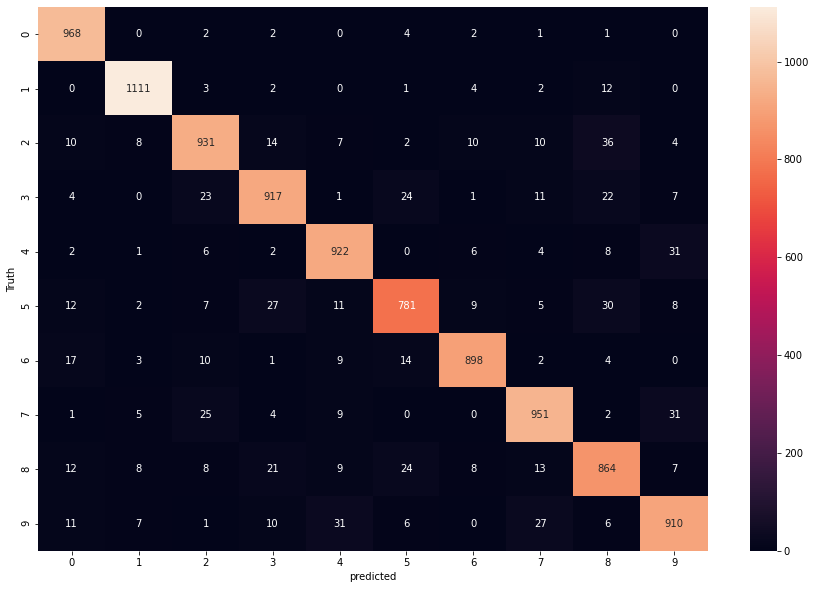

In [96]:
import seaborn as sn
plt.figure(figsize=(15,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [104]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4525 - accuracy: 0.8738
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1347 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0878 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0659 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0501 - accuracy: 0.9843


In [100]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 767us/step - loss: 0.0915 - accuracy: 0.9737


[0.09153282642364502, 0.9736999869346619]